# FNN model for MNIST Classification

In [1]:
pip install keras tensorflow numpy mnist


Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import gzip
import numpy as np
import mnist
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [56]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

#Normalize the train and test images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255 ) - 0.5

#Flatten the images
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

#Build the model
model = Sequential([
    Dense(64, activation ='relu', input_shape = (784,)),
    Dense(64, activation='relu'), 
    Dense(10, activation='softmax'),
])

In [57]:
from keras.optimizers import Adam

In [58]:
#Compile the model
model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy', metrics=['accuracy'],)


In [59]:
#Train the model
hist1 = model.fit(test_images, to_categorical(test_labels),epochs=11, batch_size=64, validation_data = (test_images,to_categorical(test_labels)))        

Train on 10000 samples, validate on 10000 samples
Epoch 1/11
10000/10000 [==============================] - 1s 80us/step - loss: 0.6654 - accuracy: 0.7837 - val_loss: 0.4093 - val_accuracy: 0.8741
Epoch 2/11
10000/10000 [==============================] - 1s 67us/step - loss: 0.3290 - accuracy: 0.8974 - val_loss: 0.2863 - val_accuracy: 0.9090
Epoch 3/11
10000/10000 [==============================] - 1s 71us/step - loss: 0.2756 - accuracy: 0.9147 - val_loss: 0.2629 - val_accuracy: 0.9137
Epoch 4/11
10000/10000 [==============================] - 1s 89us/step - loss: 0.2399 - accuracy: 0.9247 - val_loss: 0.2164 - val_accuracy: 0.9339
Epoch 5/11
10000/10000 [==============================] - 1s 66us/step - loss: 0.1969 - accuracy: 0.9372 - val_loss: 0.1854 - val_accuracy: 0.9424
Epoch 6/11
10000/10000 [==============================] - 1s 60us/step - loss: 0.1841 - accuracy: 0.9395 - val_loss: 0.1551 - val_accuracy: 0.9489
Epoch 7/11
10000/10000 [==============================] - 1s 63us/st

In [60]:
#Evaluate the model
model.evaluate(test_images, to_categorical(test_labels))

10000/10000 [==============================] - 0s 43us/step


[0.07413498266162351, 0.9764000177383423]

In [61]:
#save the model
model.save_weights('model.h5')
#model.load_weights('model.h5')
predictions = model.predict(test_images[:5])
#predictions = predictions.argmax(axis=1)
#print(np.argmax(predictions, axis=1))
#print(test_labels[:5])


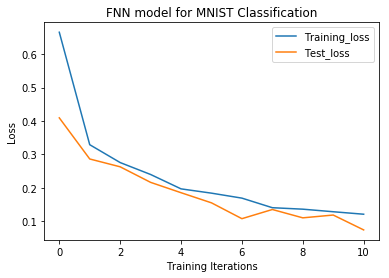

In [63]:
fig = plt.figure()
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('FNN model for MNIST Classification')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.legend(['Training_loss', 'Test_loss'])
plt.savefig('TrainingandTest_loss_epoch_is_11.png')



In [ ]:
#Reference
#https://victorzhou.com/blog/intro-to-neural-networks/
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
#https://victorzhou.com/blog/keras-neural-network-tutorial/
#https://www.kaggle.com/mohder/fnn-w-tensorflow-w-o-keras-api-applied-to-mnist